Tutorial Slides can be found at <http://bit.ly/stanford-tf-slides>

The TensorFlow website contains a lot of examples: <https://www.tensorflow.org/versions/master/tutorials/index.html>

## Linear regression example

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
logdir = "/Users/alireza/Dropbox/Courses/ECE521_2016/tf"

Our target data is generated by $y = sin(x) + 0.1 x^2 + \epsilon$, where $\epsilon \sim \mathcal N(0, \sigma^2)$.

In [2]:
train_x = np.linspace(1.0, 10.0, num=100)[:, np.newaxis]
train_y = np.sin(train_x) + 0.1 * np.power(train_x, 2) + 0.5 * np.random.randn(100, 1)

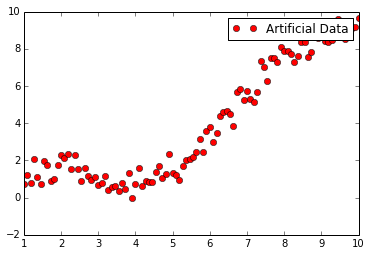

In [3]:
plt.plot(train_x, train_y, 'ro', label='Artificial Data')
plt.legend()
plt.show()

Normalizing the input by standard deviaiton:

In [4]:
std_1 = train_x.std()
std_2 = (train_x**2).std()
std_3 = (train_x**3).std()
std_4 = (train_x**4).std()
std_5 = (train_x**5).std()

Add placeholder nodes to our graph for input values $x$ and targets $y$. The only required argument to `tf.placeholder` is the datatype specification.

In [5]:
X = tf.placeholder("float", name = "X")
Y = tf.placeholder("float", name = "Y")

In [ ]:
# X_features = X / std_1

# W = tf.Variable(np.random.randn(1, 1).astype("float32"), name="weight")
# b = tf.Variable(np.random.randn(1).astype("float32"), name="bias")

Concatenate Features:

In [6]:
with tf.name_scope('x_feature') as scope:
    X_features = tf.concat(1, [X / std_1,
                               tf.pow(X, 2) / std_2,
                               tf.pow(X, 3) / std_3,
                               tf.pow(X, 4) / std_4,
                               tf.pow(X, 5) / std_5
                               ])

Build a weight variable $w$ and provide an initial value. This initial value can be a tensor or some value convertible to a tensor (e.g. a numpy `ndarray`).

In [7]:
W = tf.Variable(np.random.randn(5, 1).astype("float32"), name="weight")
b = tf.Variable(np.random.randn(1).astype("float32"), name="bias")

Creating the output node of the linear regression.

IMPORTANT: NO COMPUTATION HAPPENS AT THIS STEP. WE ARE JUST CREATING A GRAPH.

In [8]:
activation = tf.add(tf.matmul(X_features, W), b)

In [9]:
with tf.name_scope('euclidean_distance') as scope:
    cost = tf.nn.l2_loss(activation - Y) / 100.0  # L2 loss

Setting up the learning rate and etc.

In [10]:
learning_rate = 0.1
training_epochs = 8000
display_step = 200

Creating a session in order to run the graph:

In [11]:
sess = tf.InteractiveSession()

Finally, prepare a summary writer instance. (Think of this as a logger.)

We provide the current graph structure as a second argument. This structure can be visualized in TensorBoard, which reads from the summary writer's output.

In [12]:
summary_writer = tf.train.SummaryWriter(logdir, sess.graph_def)
summary_op = tf.scalar_summary("cost", cost)

Defining the optimization algorithm: Gradient Descent

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  # Gradient descent

Running the initialization operatiton of the weights.

In [14]:
init = tf.initialize_all_variables()
init.run()

We can plot the predictions of the model before training:

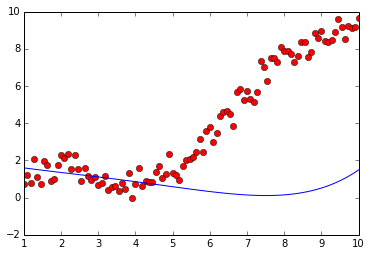

In [15]:
plt.plot(train_x, train_y, 'ro', label='Original data')
pred = sess.run(activation, feed_dict={X: np.sort(train_x)})
plt.plot(train_x, pred, label='Fitted line')

Training the model:

In [16]:
for epoch in range(1,training_epochs):
    cost_np, _, summary = sess.run([cost, optimizer, summary_op], feed_dict={X: train_x, Y: train_y})

    #Display logs per epoch step
    if epoch % display_step == 0:
        print "Epoch:%04d, cost=%0.9f" % (epoch+1, cost_np)
        summary_writer.add_summary(summary, epoch)
        
print "Optimization Finished!"
print "cost=", sess.run(cost, feed_dict={X: train_x, Y: train_y})

Epoch:0201, cost=0.462235034
Epoch:0401, cost=0.408464193
Epoch:0601, cost=0.370719492
Epoch:0801, cost=0.339269668
Epoch:1001, cost=0.312871963
Epoch:1201, cost=0.290707558
Epoch:1401, cost=0.272095561
Epoch:1601, cost=0.256465346
Epoch:1801, cost=0.243337765
Epoch:2001, cost=0.232310578
Epoch:2201, cost=0.223046318
Epoch:2401, cost=0.215261817
Epoch:2601, cost=0.208719328
Epoch:2801, cost=0.203219295
Epoch:3001, cost=0.198594078
Epoch:3201, cost=0.194703251
Epoch:3401, cost=0.191428855
Epoch:3601, cost=0.188671738
Epoch:3801, cost=0.186348930
Epoch:4001, cost=0.184390560
Epoch:4201, cost=0.182738096
Epoch:4401, cost=0.181342423
Epoch:4601, cost=0.180162415
Epoch:4801, cost=0.179163381
Epoch:5001, cost=0.178315908
Epoch:5201, cost=0.177596226
Epoch:5401, cost=0.176983580
Epoch:5601, cost=0.176460758
Epoch:5801, cost=0.176013276
Epoch:6001, cost=0.175629124
Epoch:6201, cost=0.175298274
Epoch:6401, cost=0.175011978
Epoch:6601, cost=0.174763262
Epoch:6801, cost=0.174546108
Epoch:7001, co

Plotting the learnt curve:

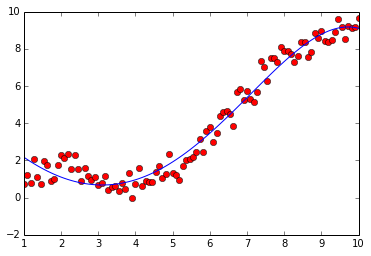

In [17]:
plt.plot(train_x, train_y, 'ro', label='Original data')
pred = sess.run(activation, feed_dict={X: np.sort(train_x)})
plt.plot(train_x, pred, label='Fitted line')

In [18]:
summary_writer.flush()